## Fourier Transform Properties

Here we explore properties of the Fourier Transform. Note that Python cannot perform continuous time fourier transforms! Python implements the Fast Fourier Transform (FFT),
which is the main algorithm for computing the *discrete time Fourier Transform*. Nonetheless, the properties that we established for the continuous time transform apply to the discrete time transform and therefore to the FFT.

We use Numpy and Matplotlib

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Linearity

Take one signal as the square wave and the other as a sawtooth.

In [2]:
def simple_fft(tsample, x):
    """ Compute and return the one-sided FFT and corresponding frequencies.

    :param tsample: Sampling period.
    :param x: Data on which to compute the FFT.
    """
    N = len(x) 
    y = np.fft.fft(x) 
    # factor of 2 because signal is split equally between negative and positive frequency
    y = 2 * y / N 
    f = np.fft.fftfreq(N, d = tsample) 
    f, y = f[:N // 2], y[:N // 2]
    return f, y

def get_square(t, T):
    cos = np.cos(2 * np.pi * (1 / T) * t)
    sign = np.sign(cos)

    return sign

def get_sawtooth(t, T):

    # - make the sawtooth switching points - #
    T2 = T/2
    t_min = t.min()
    t_max = t.max()
    t_min_mod_T2 = abs(t_min) % T2
    t_max_mod_T2 = abs(t_max) % T2
    T_vect_min = t_min - (T2 - t_min_mod_T2)
    T_vect_max = t_max + (T2 - t_max_mod_T2)
    T_vect = np.arange(T_vect_min, T_vect_max + T2, T2)

    # - make the sawtooth switches - #
    T_vect_zero = np.argmin(np.abs(T_vect))
    odd_even_zero = T_vect_zero % 2
    switches = [1 if (i % 2) == odd_even_zero else -1 for i in range(T_vect.shape[0])]

    # - make the sawtooth through interpolation - #
    sawtooth = np.interp(t, T_vect, switches)
    
    return sawtooth

In [3]:
t = np.linspace(-3, 3, int(1e5))
sqr = get_square(t, 1/5)
saw = get_sawtooth(t, 1/20)

Plot the signals

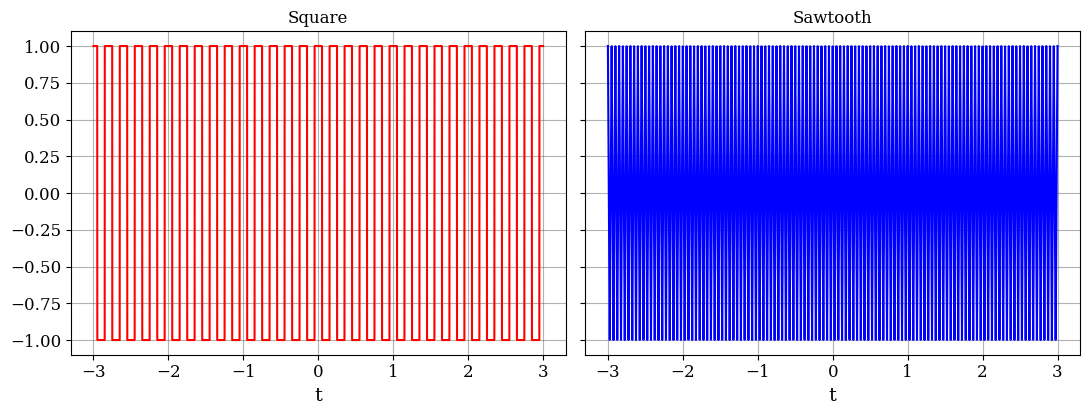

In [4]:
%matplotlib inline

figsize = (11, 4.25)
fig, axs = plt.subplots(1, 2, figsize=figsize, sharey='row')

titles = ['Square', 'Sawtooth']
for ax, title in zip(axs, titles):
    ax.set(
        xlabel='t',
        title=title,
    )

axs[0].plot(t, sqr, c='red')
axs[1].plot(t, saw, c='blue')

fig.tight_layout()

Take the fft and plot

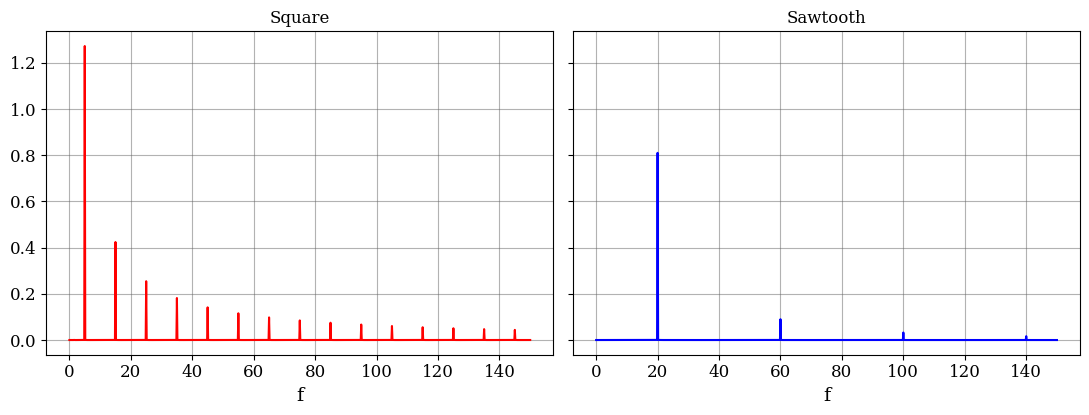

In [5]:
%matplotlib inline

tsample = t[1] - t[0]
f_sqr, fft_sqr = simple_fft(tsample, sqr)
f_saw, fft_saw = simple_fft(tsample, saw)

figsize = (11, 4.25)
fig, axs = plt.subplots(1, 2, figsize=figsize, sharey='row')
titles = ['Square', 'Sawtooth']
for ax, title in zip(axs, titles):
    ax.set(
        xlabel='f',
        title=title,
    )

plot_f_start = 0
plot_f_stop = 150
plot_sqr_inds = (plot_f_start <= f_sqr) * (f_sqr <= plot_f_stop)
plot_saw_inds = (plot_f_start <= f_saw) * (f_saw <= plot_f_stop)
# - plot the fft magnitude - #
axs[0].plot(f_sqr[plot_sqr_inds], np.abs(fft_sqr[plot_sqr_inds]), c='red')
axs[1].plot(f_saw[plot_saw_inds], np.abs(fft_saw[plot_saw_inds]), c='blue')

fig.tight_layout()

**Illustrate Linearity**

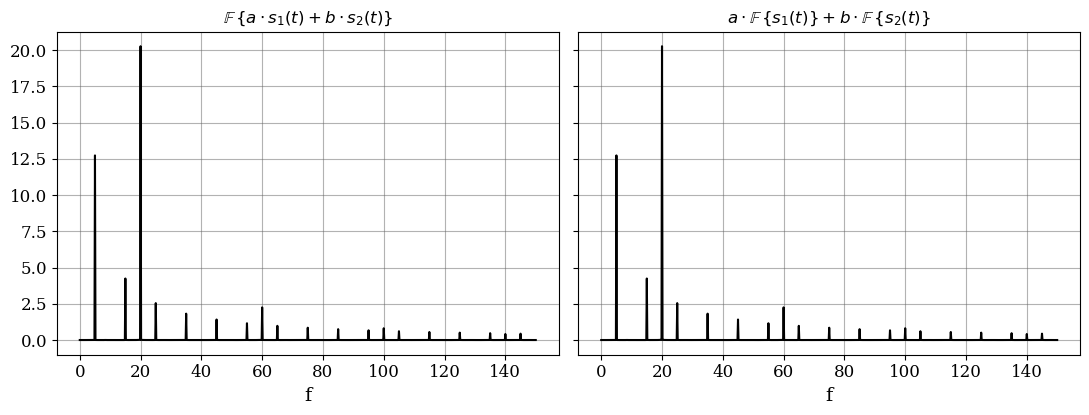

In [6]:
a = 10
b = 25

# - apply a and b to original signals, take new fft - #
time_signal = a*sqr + b*saw
f0, fft_signal0 = simple_fft(tsample, time_signal)

# - apply a and b directly to the fft of the original signals - #
f1, fft_signal1 = f_sqr, (a*fft_sqr + b*fft_saw)

# - plot - #
figsize = (11, 4.25)
fig, axs = plt.subplots(1, 2, figsize=figsize, sharey='row')
ylabels = [
    r'$\mathbb{F} \; \{ a \cdot s_1(t) + b \cdot s_2(t) \}$',
    r'$a \cdot \mathbb{F} \; \{ s_1(t) \} + b \cdot \mathbb{F} \; \{ s_2(t) \}$',
    #'test2',
]
for ylabel, ax in zip(ylabels, axs):
    ax.set_xlabel('f')
    ax.set_title(ylabel)

plot_f_start = 0
plot_f_stop = 150
plot_inds0 = (plot_f_start <= f0) * (f0 <= plot_f_stop)
plot_inds1 = (plot_f_start <= f1) * (f1 <= plot_f_stop)
axs[0].plot(f0[plot_inds0], np.abs(fft_signal0[plot_inds0]))
axs[1].plot(f1[plot_inds1], np.abs(fft_signal1[plot_inds1]))

# - titles - #
#axs[0].set_title(r'')

fig.tight_layout()

## Convolution

Redefine our square and sawtooth signals with frequencies that better illustrate this property

In [7]:
t = np.linspace(-3, 3, int(1e5))
sqr = get_square(t, 1/5)
saw = get_sawtooth(t, 1/15)

Plot the new signals

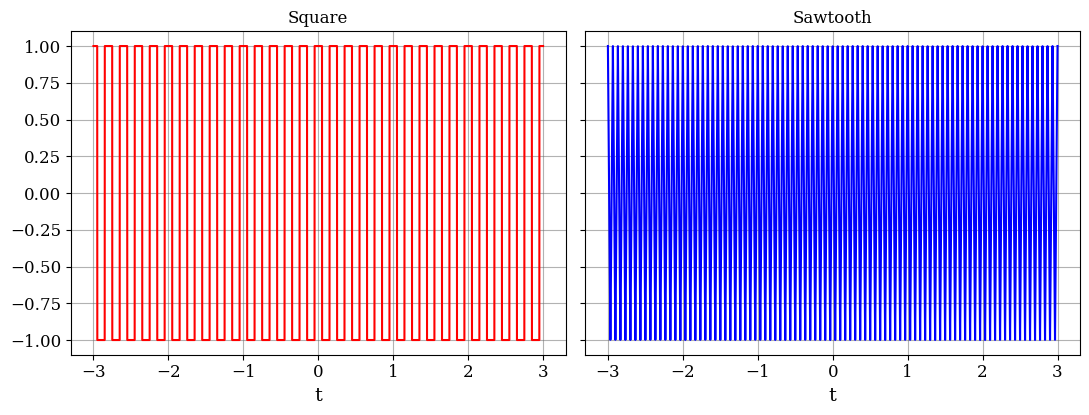

In [8]:
%matplotlib inline

figsize = (11, 4.25)
fig, axs = plt.subplots(1, 2, figsize=figsize, sharey='row')

titles = ['Square', 'Sawtooth']
for ax, title in zip(axs, titles):
    ax.set(
        xlabel='t',
        title=title,
    )

axs[0].plot(t, sqr, c='red')
axs[1].plot(t, saw, c='blue')

fig.tight_layout()

fft and plot

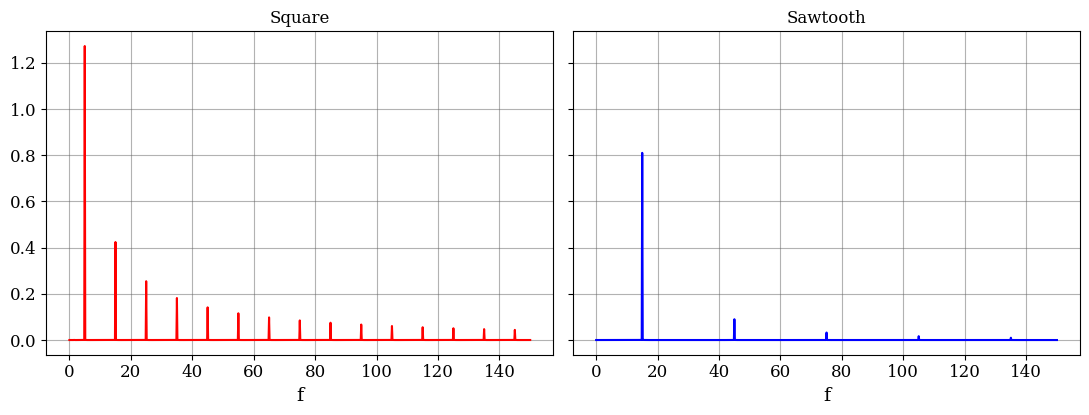

In [9]:
%matplotlib inline

tsample = t[1] - t[0]
f_sqr, fft_sqr = simple_fft(tsample, sqr)
f_saw, fft_saw = simple_fft(tsample, saw)

figsize = (11, 4.25)
fig, axs = plt.subplots(1, 2, figsize=figsize, sharey='row')
titles = ['Square', 'Sawtooth']
for ax, title in zip(axs, titles):
    ax.set(
        xlabel='f',
        title=title,
    )

plot_f_start = 0
plot_f_stop = 150
plot_sqr_inds = (plot_f_start <= f_sqr) * (f_sqr <= plot_f_stop)
plot_saw_inds = (plot_f_start <= f_saw) * (f_saw <= plot_f_stop)
# - plot the fft magnitude - #
axs[0].plot(f_sqr[plot_sqr_inds], np.abs(fft_sqr[plot_sqr_inds]), c='red')
axs[1].plot(f_saw[plot_saw_inds], np.abs(fft_saw[plot_saw_inds]), c='blue')

fig.tight_layout()

#### Convolution in time corresponds to multiplication in frequency

In [10]:
# - convolve the square and saw signals in time - #
sqr_saw_convolve = np.convolve(sqr, saw, mode='full')
sqr_saw_convolve /= sqr_saw_convolve.max()

# - multiply the square and saw fourier transforms - #
f_mult, fft_sqr_saw_mult = f_sqr, (fft_sqr * fft_saw)

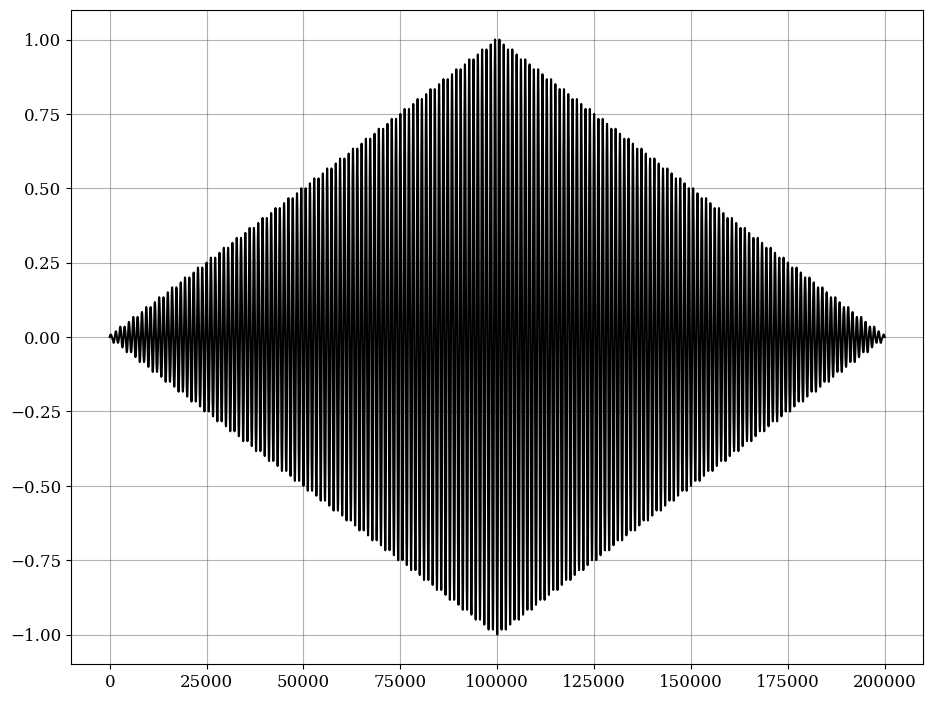

In [11]:
#plt.plot(t, sqr_saw_convolve)
plt.plot(sqr_saw_convolve)

Perform the fft

In [12]:
f_conv, fft_sqr_saw_convolve = simple_fft(tsample, sqr_saw_convolve)

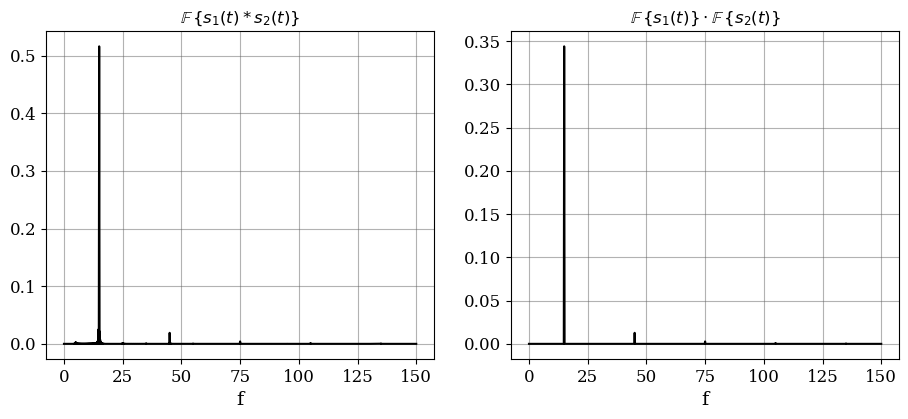

In [14]:
figsize = (11, 4.25)
fig, axs = plt.subplots(1, 2, figsize=figsize)

titles = [r'$\mathbb{F} \; \{ s_1(t) * s_2(t) \}$', r'$\mathbb{F} \; \{ s_1(t) \} \cdot \mathbb{F} \; \{ s_2(t) \}$']
for title, ax in zip(titles, axs):
    ax.set_title(title)
    ax.set_xlabel('f')

plot_f_start = 0
plot_f_stop = 150
plot_inds_conv = (plot_f_start <= f_conv) * (f_conv <= plot_f_stop)
plot_inds_mult = (plot_f_start <= f_mult) * (f_mult <= plot_f_stop)
axs[0].plot(f_conv[plot_inds_conv], np.abs(fft_sqr_saw_convolve[plot_inds_conv]))
axs[1].plot(f_mult[plot_inds_mult], np.abs(fft_sqr_saw_mult[plot_inds_mult]))

#### Multiplication in time corresponds to convolution in frequency

Perform the multiplication and convolution

In [20]:
# - multiply in time, then fft - #
sqr_saw_mult = sqr * saw
f_mult, fft_sqr_saw_mult = simple_fft(tsample, sqr_saw_mult)

# - convolve in frequency - #
fft_sqr_saw_conv = np.convolve(fft_saw, fft_sqr)

Plot

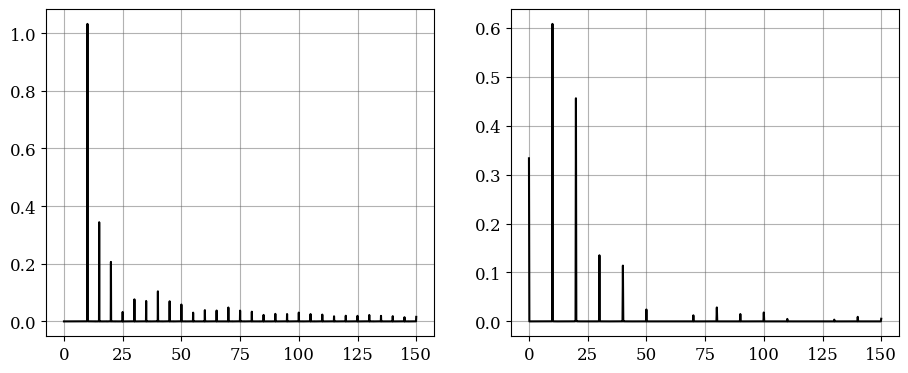

In [21]:
figsize = (11, 4.25)
fig, axs = plt.subplots(1, 2, figsize=figsize)

plot_f_start = 0
plot_f_stop = 150
plot_inds_conv = (plot_f_start <= f_conv) * (f_conv <= plot_f_stop)
plot_inds_mult = (plot_f_start <= f_mult) * (f_mult <= plot_f_stop)
axs[0].plot(f_conv[plot_inds_conv], np.abs(fft_sqr_saw_conv[plot_inds_conv]))
axs[1].plot(f_mult[plot_inds_mult], np.abs(fft_sqr_saw_mult[plot_inds_mult]))